In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
TW = pd.read_csv('C:/Users/jxjsj/Desktop/TW.csv')

In [3]:
HK_SP = pd.read_csv('C:/Users/jxjsj/Desktop/HK&SP500.csv').rename(columns={'Unnamed: 0':'day'})

In [4]:
TW['day'] = TW['day'].apply(lambda x: str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8])

In [5]:
tol_df = HK_SP.merge(TW,on=['day'],how='left')

In [6]:
tol_df['TW_Ione_close'] = tol_df['TW_Ione_close'].fillna(method='ffill')

In [7]:
tol_df['TW_Ione_return'] = (tol_df['TW_Ione_close']/tol_df['TW_Ione_close'].shift(1)-1)*100

In [8]:
## 两种序列起点选择
# tol_df_used = tol_df.iloc[:-1,:][['day','HK_Ione_return','SP500_return','TW_Ione_return']].copy()
tol_df_used = tol_df.iloc[:-1,:][['day','HK_Ione_return','SP500_return','TW_Ione_return']].copy().dropna(how='any',axis=0)

In [9]:
tol_df_used['HK_daily_error'] = tol_df_used['HK_Ione_return'] - tol_df_used['SP500_return']

In [10]:
tol_df_used['TW_daily_error'] = tol_df_used['TW_Ione_return'] - tol_df_used['SP500_return']

In [29]:
tol_df_used_error = tol_df_used.set_index('day').rolling(126).std()

In [30]:
tol_df_used_error['TW_vs_HK_error'] = tol_df_used_error['TW_daily_error'] - tol_df_used_error['HK_daily_error']

In [37]:
tol_df_used.std()['HK_daily_error']
tol_df_used.std()['TW_daily_error']

1.539882142053319

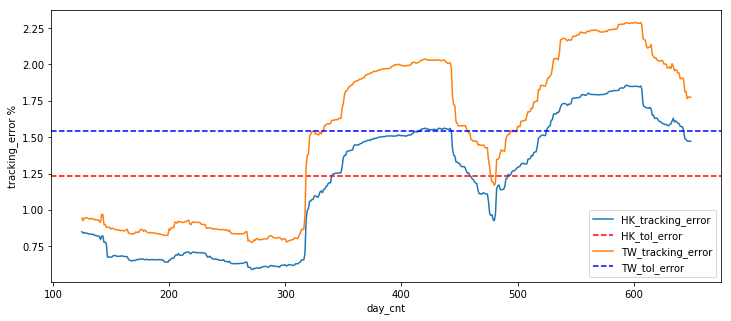

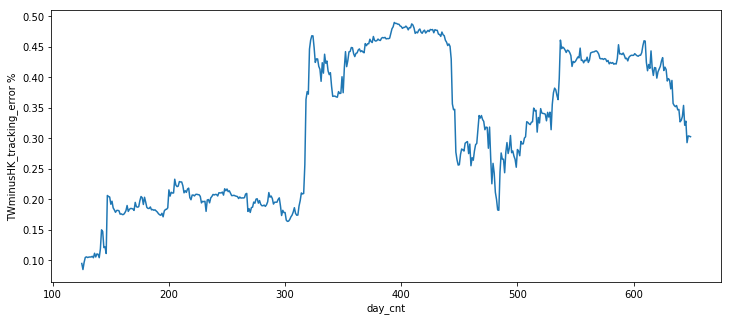

In [40]:
plt.figure(figsize=(12, 5))

plt.plot(tol_df_used_error['HK_daily_error'].tolist(),label='HK_tracking_error')
plt.axhline(tol_df_used.std()['HK_daily_error'], color='r', ls='dashed', lw=1.5,
            label='HK_tol_error')

plt.plot(tol_df_used_error['TW_daily_error'].tolist(),label='TW_tracking_error')
plt.axhline(tol_df_used.std()['TW_daily_error'], color='b', ls='dashed', lw=1.5,
            label='TW_tol_error')

plt.xlabel('day_cnt')
plt.ylabel('tracking_error %')
plt.legend(loc=4)

plt.show()

plt.figure(figsize=(12, 5))
plt.plot(tol_df_used_error['TW_vs_HK_error'].tolist(),label='TW_tracking_error')

plt.xlabel('day_cnt')
plt.ylabel('TWminusHK_tracking_error %')

plt.show()

In [28]:
tol_df_used_error.to_csv('C:/Users/jxjsj/Desktop/HK_TW_tracking_error.csv')